### Universidade Federal de São Carlos (UFSCar)


Cauã Benini - RA: 801046

Guilherme dos Santos Wisniewski	- RA: 813319

Lucas Pereira Quadros - RA: 800981

Pedro Vinícius Guandalini Vicente - RA: 812124

<br>

---

# **Etapa 2 do Projeto - Processamento e Visualização de Dados**


---

## Introdução

O objetivo deste projeto consiste na seleção de um conjunto de dados relevante, sobre o qual serão executadas tarefas de processamento e visualização de dados a partir dos métodos mostrados na disciplina. Serão assim desenvolvidas etapas de escolha dos dados, processamento inicial destes, aplicação dos métodos de visualização de resultados e conclusões gerais, todas descritas detalhadamente a seguir. Logo abaixo, encontram-se as importações das bibliotecas utilizadas para o desenvolvimento.


In [1]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn statsmodels

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# bibliotecas necessarias para leitura de dados e visualizacao
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# metricas de desempenho e processamento em geral
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# ignora warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Seleção do Dataset



Nesta etapa, foi selecionado um conjunto de dados real referente ao censo americano de 1994. Assim, um possível objetivo do projeto seria **predizer, com base em algortitmos de aprendizado de máquina, se a renda de um adulto excede ou não $50K/ano, baseando-se nos demais dados pessoais colhidos no censo**.

O dataset em questão foi escolhido por se destacar ao oferecer uma rica fonte de informações sobre um tema social de grande relevância. A coleta de dados a partir de um censo garante a abrangência e representatividade da amostra, possibilitando uma análise profunda e abrangente do tema. A combinação da relevância temática com a riqueza dos dados reais abre um leque de possibilidades para a realização de análises e a descoberta de novos conhecimentos.

Os dados podem ser acessados a partir do link: https://archive.ics.uci.edu/dataset/2/adult



In [3]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# aspecto geral dos dados
data = adult.data.original
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Estudo e Preparação


Inicialmente, o conjunto de dados será estudado, de forma a selecionar e pré-processar os atributos. Primeiramente, é feita uma apresentação inicial do que cada atributo representa e como estão organizados.

Os dados são organizados em 15 atributos, havendo um total de 48842 tuplas.


In [5]:
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Apesar dos nomes autoexplicativos, é válida uma apresentação detalhada de cada um. Assim sendo, temos:

1. **age:** idade
2. **workclass:** categoria de trabalho
3. **fnlwgt:** peso final, estimativa de quão representativa a amostra é em relação à população total
4. **education:** nível de escolaridade
5. **education-num:** nível de escolaridade
6. **marital-status:** estado civil
7. **occupation:** ocupação
8. **relationship:** relacionamento familiar
9. **race:** raça
10. **sex:** sexo
11. **capital-gain:** renda obtida através de investimentos
12. **capital-loss:** renda perdida através de investimentos
13. **hours-per-week:** horas trabalhadas por semana
14. **native-country:** país nativo
15. **income:** renda, atributo alvo


Faz-se necessária uma exploração inicial e pré-processamento dos dos dados, para garantir a qualidade deles e posterior eficiência dos modelos aplicados. Assim, aplica-se os seguintes passos:

1. Visualização inicial dos dados
2. Seleção de atributos
3. Tratamento de tuplas vazias e duplicadas
4. Tratamento e seleção de atributos nominais
5. Tratamento de atributos numéricos

### 1. Visualização inicial dos dados

Nesta primeira etapa, será feita a exploração inicial dos dados a partir de métodos visuais, de forma e gerar uma compreensão inicial acerca deles, permitindo que decisões plausíveis sejam tomadas nas etapas seguintes, baseando-se na semântica do conjunto. Tal agrupamento ainda é útil pois determinados valores dentro das distribuições de valores possíveis aparecem em baixa frequência, de modo que faz mais sentido, semanticamente, agrupar tais valores em grupos maiores.

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### Visualização da tabela de atributos categóricos

Em uma primeira visualização dos atributos categóricos, nota-se uma grande variedade de valores possíveis para **native-country** e **education**, o que pode ser maléfico para o encontro de padrões. Por isso, posteriormente, agrupamento desses valores deverão ser feitos. Tal agrupamento ainda é útil pois determinados valores dentro das distribuições de valores possíveis aparecem em baixa frequência, de modo que faz mais sentido, semanticamente, agrupar tais valores em grupos maiores.


In [8]:
nominal_attributes = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
nominal_data = data[nominal_attributes]

nominal_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [9]:
for nominal_attribute in nominal_attributes:
  print('quantidade atributos únicos para', nominal_attribute, ':', nominal_data[nominal_attribute].nunique())

quantidade atributos únicos para workclass : 9
quantidade atributos únicos para education : 16
quantidade atributos únicos para marital-status : 7
quantidade atributos únicos para occupation : 15
quantidade atributos únicos para relationship : 6
quantidade atributos únicos para race : 5
quantidade atributos únicos para sex : 2
quantidade atributos únicos para native-country : 42


In [10]:
for nominal_attribute in nominal_attributes:
  print(nominal_data[nominal_attribute].value_counts())
  print('------------------\n')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
------------------

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
------------------

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
------------------

occupation
Prof-specialt

#### Visualização de atributos numéricos

Nesta etapa, usou-se o *describe* para ter uma noção geral dos atributos numéricos, o que permitiu notar uma alta variabilidade na distribuição de **fnlwgt**, além de muitas escalas diferentes entre os atributos, o que gera a necessidade de posterior normalização dos dados.

In [11]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


A partir dos histogramas abaixo, é possível obter um panorama geral da população americana de 1994, como em questões de idade, escolaridade e padrão de jornada de trabalho. Fora isso, percebe-se também que uma parcela pouco significativa da população realizava investimentos, o que pode ser observado a partir da pequena porcentagem de indivíduos tanto que ganharam, quanto perderam dinheiro a partir disso.

In [12]:
data_copy = data.copy()

data_copy['income'] = data['income'].apply(lambda x: 0 if x in ['<=50K', '<=50K.'] else 1)

data_copy.head()

numeric_attributes = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
numeric_data = data_copy[numeric_attributes]

numeric_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


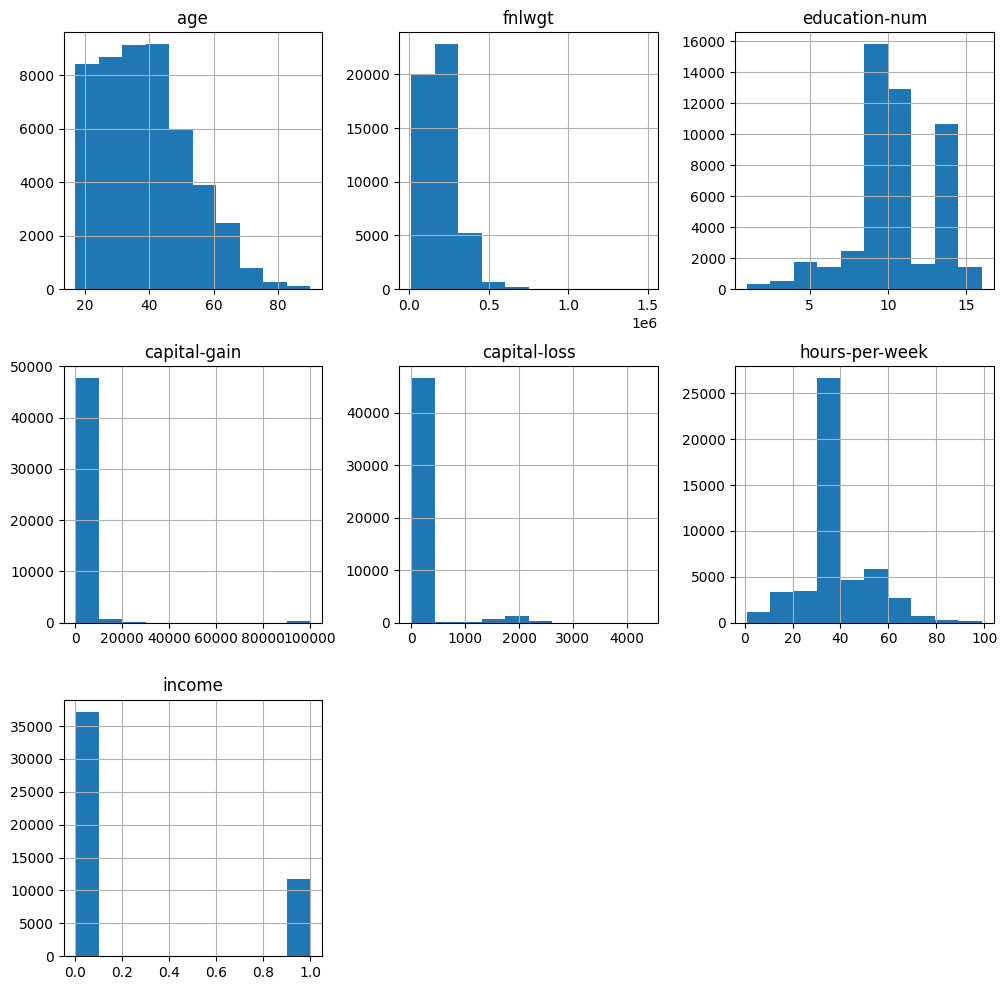

In [13]:
numeric_data.hist(figsize=(12,12),layout=(3,3),sharex=False);

### 2. Seleção de atributos

Inicialmente, são retirados os atributos irrelevantes ou redundantes. Logo percebe-se que os atributos **education** e **education-num** representam o mesmo tipo de dado, sendo equivalentes. Isso pode ser compreendido a partir do gráfico abaixo, que os associa. Nota-se que cada categoria nominal tem uma correspondência clara e consistente com os valores numéricos, sem intersecções, indicando que cada valor possui seu correspondente direto e os atributos são equivalentes. O segundo (education-num) representa de forma numérica e ordinal os níveis de escolaridade indicados, de forma nominal, em education. Dessa forma, tem-se que education-num adiciona mais informação ao conjunto, conseguindo representar a ideia de ordem entre os possíveis valores que o atributo pode possuir. Além disso, ao utilizar atributos numéricos, facilita-se a aplicação de operações matemáticas e estatísticas fundamentais para nossa análise. Com isso, define-se que o atributo **education** será removido do conjunto sem perda de informação.


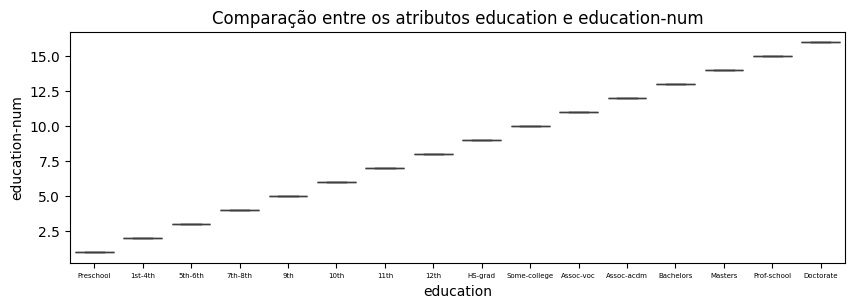

In [14]:
plt.figure(figsize=(10, 3))
order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.boxplot(x='education', y='education-num', data=data, order=order)
plt.title('Comparação entre os atributos education e education-num')
plt.xticks(fontsize=5)
plt.show()

Ao analisar o atributo **fnlwgt**, identificamos características que podem comprometer a qualidade da análise. A alta dispersão dos valores e o grande número de valores únicos sugerem uma variabilidade excessiva que pode dificultar a identificação de padrões e a interpretação dos resultados.

A presença significativa de outliers é outro ponto de preocupação. Esses valores extremos podem distorcer as medidas estatísticas. Embora representem indivíduos com características únicas, sua influência desproporcional pode mascarar padrões subjacentes nos dados.

Considerando esses aspectos, associado ao fato de que esse atributo não possui valor semântico para o conjunto de dedos, foi decidido pela **remoção do atributo fnlwgt**. Ao simplificar o conjunto de dados, reduzimos o ruído e facilitamos a identificação de padrões mais claros e robustos.

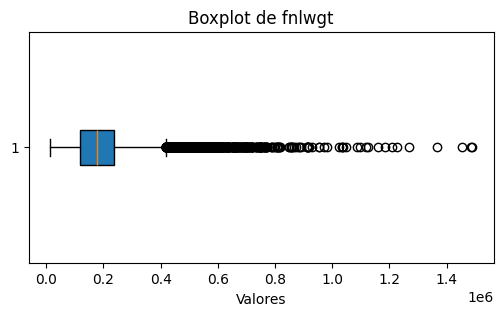

Média: 189664.13459727284
Mediana: 178144.5
Variância: 11152210185.574848
Desvio Padrão: 105604.02542315728
Amplitude: 1478115
Q1 (1º Quartil): 117550.5
Q3 (3º Quartil): 237642.0
Amplitude Interquartil (IQR): 120091.5
Coeficiente de Variação (CV): 0.5567949135317213
Mínimo:  12285
Máximo:  1490400
Quantidade de valores únicos:  28523


In [15]:
# Boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(data['fnlwgt'], vert=False, patch_artist=True)

plt.title('Boxplot de fnlwgt')
plt.xlabel('Valores')

mean_value = np.mean(data['fnlwgt'])
median_value = np.median(data['fnlwgt'])

plt.show()

# Estatísticas
mean = data['fnlwgt'].mean()
median = data['fnlwgt'].median()
variance = data['fnlwgt'].var()
std_dev = data['fnlwgt'].std()
range_value = data['fnlwgt'].max() - data['fnlwgt'].min()
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
cv = std_dev / mean

# Resultados
print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Variância: {variance}")
print(f"Desvio Padrão: {std_dev}")
print(f"Amplitude: {range_value}")
print(f"Q1 (1º Quartil): {Q1}")
print(f"Q3 (3º Quartil): {Q3}")
print(f"Amplitude Interquartil (IQR): {IQR}")
print(f"Coeficiente de Variação (CV): {cv}")
print(f"Mínimo: ", data['fnlwgt'].min())
print(f"Máximo: ", data['fnlwgt'].max())
print(f"Quantidade de valores únicos: ", data['fnlwgt'].nunique())

Em seguida, foram buscados atributos nominais com grande variedade de valores, que poderiam dificultar a classificação sem adicionar valor significativo ao modelo. No entanto, o único que apresentou problemas em relação a isso foi **native-country**, que, por suas características semânticas, será tratado e explicado posteriormente, sem necessidade de remoção.

Dessa forma, foram apenas retirados do conjunto de dados os atributos **education** e **fnlwgt**.

In [16]:
unique = nominal_data.nunique()
unique

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [17]:
data = data.drop(columns=['education', 'fnlwgt'])
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3. Tratamento de tuplas vazias e duplicadas

Inicialmente, são retiradas todas as tuplas reconhecidas como duplicadas, visto que não adicionam informação ao conjunto.

In [18]:
print(data.duplicated().sum())
data = data.drop_duplicates()

4487


Em seguida, como é possível notar, existem alguns valores vazios no dataset. Devido ao fato da quantidade total ser relativamente pequena em relação ao total (cerca de 2%), optou-se por retirar tais tuplas. Essa abordagem foi escolhida para evitar qualquer distorção nos dados que poderia surgir ao utilizar métodos para completar valores ausentes. Ao remover essas tuplas, garantimos que o restante do conjunto de dados permanece o mais próximo possível da realidade observada, preservando a integridade dos dados e reduz o potencial de viés introduzido por imputações arbitrárias.

É importante notar que os valores vazios nos atributos **workclass** e **occupation** aconteciam, em sua maioria, nas mesmas tuplas. Desta forma, apesar do valor total de 2020 nulos, apenas 1229 tuplas foram efetivamente removidas nesta fase.

In [19]:
data.isna().sum()

age                 0
workclass         872
education-num       0
marital-status      0
occupation        875
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    273
income              0
dtype: int64

In [20]:
len_before = len(data)
data = data.dropna()
len_after = len(data)

print("Quantidade de linhas removidas: ", len_before - len_after)

Quantidade de linhas removidas: 

 1129


Em seguida, também foi notada considerável quantidade de valores '?' nos atributos **workclass**, **occupation** e **native-country** (mesmos atributos que possuíam valores vazios). Isso pode ter acontecido devido a uma falha na coleta de tais dados e posteriores problemas de codificação, representando os valores ausentes de diferentes maneiras (NaN, NA, None e "?"). Assim, por se tratar novamente de uma quantidade de valores que, se removida, não acarretará grande perda de dados, optou-se por apenas excluir tais tuplas.

Assim, apesar da possibilidade de imputar os dados nas classes majoritárias (dado que são significantemente mais robustas que as demais), foi tomada a decisão de não correr os riscos mencionados anteriormente, visto que o tamanho do conjunto de dados não será fortemente afetado.

In [21]:
k = data[data.apply(lambda row: any(row == '?'), axis=1)]
print("Atributos que possuem '?': ", k.columns[k.isin(['?']).any()])

print("\nQuantidade total de valores '?': ", data[data.apply(lambda row: any(row == '?'), axis=1)].shape[0])

Atributos que possuem '?':  Index(['workclass', 'occupation', 'native-country'], dtype='object')

Quantidade total de valores '?':  2192


In [22]:
data = data.replace('?', pd.NA)
data = data.dropna()

print("Formato dos dados após remoção de tuplas e atributos: ", data.shape)

Formato dos dados após remoção de tuplas e atributos:  (41034, 13)


Neste ponto, notou-se também a existência de valores redundantes no atributo alvo, onde as 2 classes existentes eram duplicadas com uma nova versão finalizada com ponto final. Isso pode ser observado a seguir, assim como sua resolução. Optou-se por antecipar o passo seguinte (tratamento dos atributos nominais) e aproveitar a substituição de valores para já transformar os valores nominais por numéricos (0, para "<=50K" e 1, para ">50K"), adequando-se ao padrão dos modelos.

In [23]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [24]:
data['income'] = data['income'].apply(lambda x: 0 if x in ['<=50K', '<=50K.'] else 1)

### 4. Tratamento e seleção de atributos nominais

Dentre os atributos nominais, é importante considerar ajustes específicos em relação à variável **native-country**, que indica o país de origem. Apesar da grande variedade de valores possíveis, é notável que o valor majoritário (Estados Unidos) é muito mais representativo do que a soma das demais nacionalidades. Diante disso, optamos por separar os indivíduos entre americanos e imigrantes. Essa distinção se mostra importante, sobretudo considerando a disparidade em relação às nacionalidades menos representadas no contexto da análise de renda dos indivíduos e contextos de preconceito associado à obtenção de empregos no país.

In [25]:
data['native-country'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

Em seguida, os demais atributos nominais foram transformados em numéricos (binários) para melhor adequação aos modelos que serão aplicados. Assim, foi aplicada a codificação One-Hot, onde cada valor único da variável é transformado em uma nova variável binária. Cada nova variável representa a presença ou ausência desse valor na observação original.

Essa abordagem vai criar uma matriz esparsa com muitas colunas binárias. Neste ponto, foi considerado gerar agrupamentos semânticos entre os possíveis valores de alguns atributos para diminuir o custo computacional da matriz e não aumentar desnecessariamente a dimensionalidade. No entanto, dois dos atributos que possuíam maior variedade de valores (**education-num** e **native-country**) foram transformados em numéricos, descartando tal necessidade.

O outro atributo com maior variedade (**occupation**), no entanto, não foi agrupado. Esta decisão se deu pela diferença considerável nas distribuições que poderiam ser consideradas semanticamente agrupáveis, o que poderia modificar os dados e gerar resultados falsos. No gráfico percebe-se como as categorias com distribuição similar não estão semanticamente associadas.

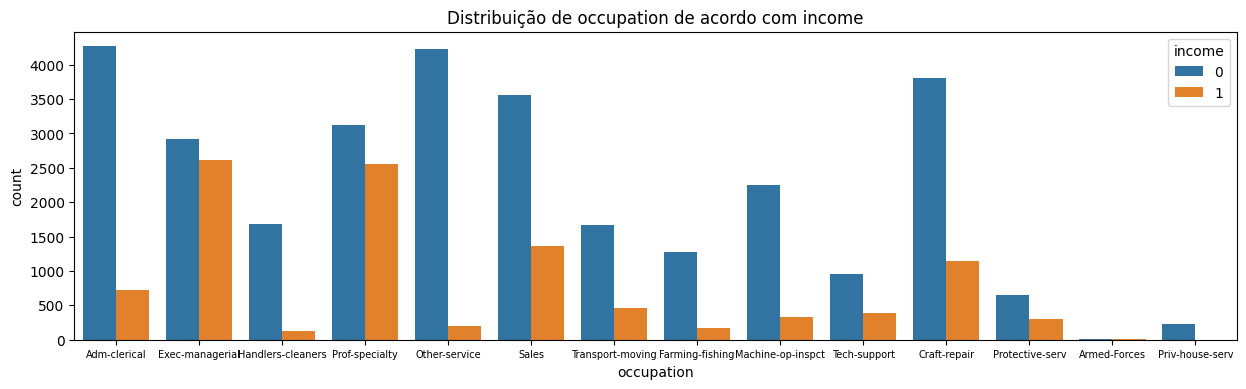

In [26]:
# gráfico de barras empilhadas
plt.figure(figsize=(15, 4))
sns.countplot(data=data, x='occupation', hue='income')
plt.title('Distribuição de occupation de acordo com income')
plt.xlabel('occupation')
plt.xticks(fontsize=7)
plt.show()

Neste ponto, pôde-se enfim aplicar a técnica e deixar todos os dados, finalmente, numéricos.

In [27]:
# especificando as colunas alvo da transformação
target_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# usando a função get_dummies
data_encoded_columns = pd.get_dummies(data[target_columns], drop_first=True, dtype=int)

# concatenando as novas colunas binárias na tabela e removendo as nominais originais
data = pd.concat([data.drop(columns=target_columns), data_encoded_columns], axis=1)

In [28]:
print("Formato dos dados após tratamento dos atributos nominais: ", data.shape)

Formato dos dados após tratamento dos atributos nominais:  (41034, 42)


### 5. Tratamento de atributos numéricos

Em relação aos atributos numéricos, **capital-gain** e **capital-loss** (que indicam ganho ou perda de dinheiro através de investimentos) chamam atenção inicialmente, pois a maior parte dos seus valores é 0. Assim, a decisão tomada foi por reduzir tais dados em "nunca investiu" (ambos capital-gain e capital-loss são 0), "investiu e teve ganhos" (capital-gain é maior que 0) e "investiu e teve perdas" (capital-loss é maior que 0). Para eles, serão atribuídos os números 0, 0.5 e 1, respectivamente. Vale ressaltar que não há intersecções onde o indivíduo teve capital-gain e capital-loss maior que 0, visto que o valor resultante é a diferença de ambos.

In [29]:
data['investment_status_naoDiscretizado'] = data.apply(lambda row: 0 if row['capital-gain'] == 0 and row['capital-loss'] == 0 else (row['capital-gain'] if row['capital-gain'] > 0 else -1 * row['capital-loss']), axis=1)

In [30]:
data['investment_status'] = data.apply(lambda row: 0 if row['capital-gain'] == 0 and row['capital-loss'] == 0 else (0.5 if row['capital-gain'] > 0 else 1), axis=1)
data = data.drop(columns = ['capital-gain', 'capital-loss'])

Em seguida, iniciou-se a normalização dos demais dados numéricos. O objetivo é impedir que atributos com valores maiores dominem aqueles com valores menores nos cálculos dos modelos, reduzir a influência de outliers e facilitar a comparação entre os atributos durante a aplicação dos modelos.

No entanto, antes de realizar tal etapa, foram analisadas as distribuições dos atributos **hours-per-week** e **education-num**, como se segue.

No primeiro, percebeu-se a frequência significantemente maior de 40h de trabalho semanais. Esse tipo de fato pode acarretar principalmente em problemas de generalização se não tratados. Isso se dá pois o modelo aprende a prever o valor dominante, ignorando ou subestimando os valores menos frequentes. Assim, a decisão tomada foi por agrupar valores menos frequentes em categorias mais gerais, aumentando a representatividade de cada grupo. Assim, considerando que 40 horas é a quantidade padrão de horas trabalhadas por semana e reconhecendo que trabalhar mais de 40 horas é mais significativo para a renda do que trabalhar menos, decidimos criar três grupos distintos para melhor representar esses dados: menos de 40 horas (<40h), exatamente 40 horas (=40h), e mais de 40 horas (>40h). Atribuímos os valores 0, 0.5 e 1 a esses grupos, respectivamente, para refletir sua importância relativa e facilitar a análise. É exibida em seguida o novo histograma do atributo, onde percebe-se que os valores estão melhor distribuídos.

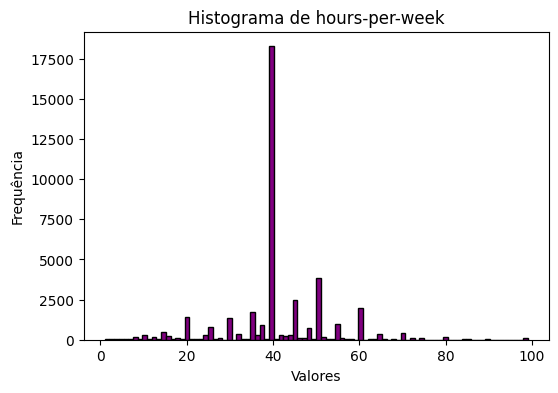

In [31]:
plt.figure(figsize=(6, 4))
plt.hist(data['hours-per-week'], bins=90, color='purple', edgecolor='black')

plt.title('Histograma de hours-per-week')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [32]:
data_before = data.copy()
data['hours-per-week'] = data.apply(lambda row: 0 if row['hours-per-week'] < 40 else (0.5 if row['hours-per-week'] == 40 else 1), axis=1)

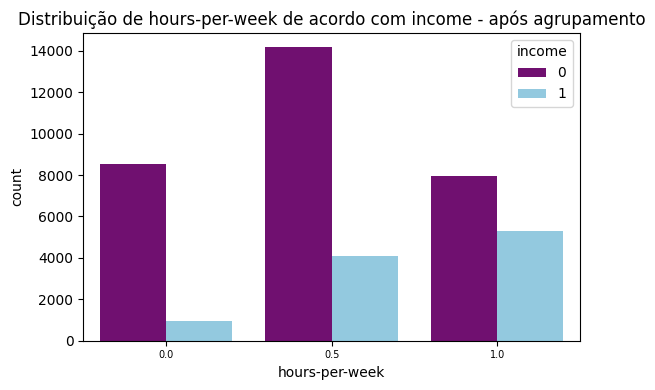

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='hours-per-week', hue='income', palette=["purple", "skyblue"])
plt.title('Distribuição de hours-per-week de acordo com income - após agrupamento')
plt.xlabel('hours-per-week')
plt.xticks(fontsize=7)

plt.tight_layout()
plt.show()

Em relação ao atributo **education-num**, há uma questão similar a ser tratada. Os valores de 9 e 10 são muito mais significativos que os demais até 8, podendo causar os mesmos problemas de generalização. Assim, optou-se também por realizar agrupamento: entre os valores 1 a 8 que, semanticamente, voltando ao atributo categórico **education**, se tratariam dos níveis de escolaridade que contemplam o ensino fundamental. Desta forma, mantém-se a coerência dos dados, ajustando-os para fornecer melhores resultados.

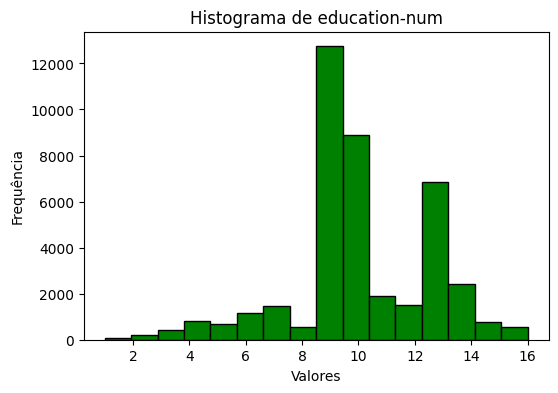

In [34]:
plt.figure(figsize=(6, 4))
plt.hist(data['education-num'], bins=16, color='green', edgecolor='black')
plt.title('Histograma de education-num')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

In [35]:
data['education-num'] = data['education-num'].apply(lambda x: 8 if x <= 8 else x)

O atributo **age**, por sua vez, pôde ser normalizado sem problemas, visto que sua distribuição aproxima-se da distribuição Gaussiana e não possui agravantes que devessem ser corrigidos.

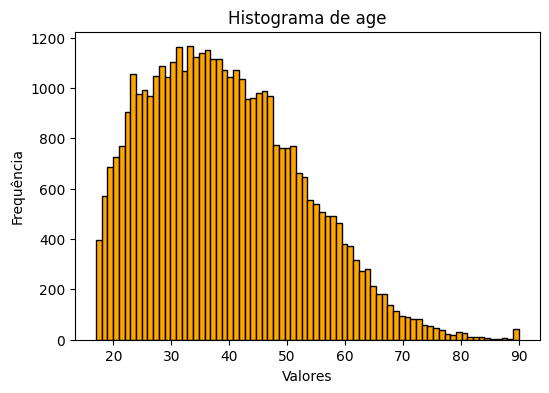

In [36]:
plt.figure(figsize=(6, 4))
plt.hist(data['age'], bins=74, color='orange', edgecolor='black')

plt.title('Histograma de age')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

Assim, pôde-se finalmente normalizar entre 0 e 1 os atributos numéricos restantes. Para isso, escolheu-se a normalização Min-Max, visto que ela é capaz de manter a distribuição relativa dos dados e se mostra adequada e eficiente para dados que seguem uma distribuição uniforme, como é o caso. Por fim, é exibido o aspecto geral dos dados processados.

In [37]:
data['age_naoDiscretizada'] = data['age']
scaler = MinMaxScaler()
data[['age', 'education-num', 'hours-per-week']] = scaler.fit_transform(data[['age', 'education-num', 'hours-per-week']])

In [38]:
data

,age,education-num,hours-per-week,native-country,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,investment_status_naoDiscretizado,investment_status,age_naoDiscretizada
0,0.301370,0.625,0.5,1,0,0,0,0,0,1,...,0,0,0,0,0,1,1,2174,0.5,39
1,0.452055,0.625,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0.0,50
2,0.287671,0.125,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0.0,38
3,0.493151,0.000,0.5,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0.0,53
4,0.150685,0.625,0.5,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0.219178,0.625,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0.0,33
48837,0.301370,0.625,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.0,39
48839,0.287671,0.625,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0.0,38
48840,0.369863,0.625,0.5,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,5455,0.5,44


### Salvamento dos dados em um .csv

Para utilização em outros programas, deve-se salvar o arquivo após o processamento.

In [39]:
data.to_csv("data_processada.csv", sep=",", decimal=",", index=False, encoding="utf-8")

## Levantamento de hipóteses

Nessa etapa, foram descritas 5 hipóteses que a análise dos dados via visualização dos dados pode responder.

Para cada hipótese foi descrito:

a)       Hipótese.

b)      Tipo de gráfico e atributos envolvidos que permitem validar ou refutar a hipótese.

c)       Que tipo de comportamento do gráfico esperado para a:

* c1.      A validação da hipótese

* c2.       A refutação da hipótese

d)      Uma tarefa de mineração de dados pode ser usada validar ou refutar a hipótese?

* d1.       Qual?

* d2.       Qual a saída dessa tarefa permite validar a hipótese?

* d3.       Qual a saída dessa tarefa permite refutar a hipótese?

### Hipótese 1 - A renda dos indivíduos está diretamente relacionada a sua educação e seu gênero

Para validar ou refutar essa hipótese usando gráficos, será necessário plotar um **HeatMap (Gráfico de Correlação)** que contenha os atributos de renda, educação e gênero.
* Se os valores das correlações "renda x educação" e "renda x gênero" forem altas (próximas de 1), nossa hipótese foi validada.
* Se os valores das correlações "renda x educação" e "renda x gênero" forem baixas (próximas de 0), nossa hipótese foi refutada.

#### Mineração de Dados
Para validar ou refutar essa hipótese usando mineração de dados, podemos realizar um agrupamento com o **Kmeans** considerando apenas os atributos renda, educação e gênero, e depois plotar em 3D para as análises.
* Se foi formados grupos compactos com indivíduos com educação alta, gênero masculino predominante e salário alto, então nossa hipótese foi validada.
* Se não foi possível notar a formação de grupos compactos com indivíduos com educação alta, gênero masculino predominante e salário alto, então nossa hipótese foi refutada.

<br>
<hr>

#### Gráficos da Hipótese 1:

Foi utilizada a correlação para compreender as relações entre os atributos numéricos. Pode-se ver também que há, mesmo que fraca, certa correlação entre o atributo alvo e os demais atributos numéricos, principalmente **education-num**, **age** e **hours-per-week**.

Fora isso, percebe-se também que não há nenhuma correlação significativa para supor que há dependência considerável entre atributos.

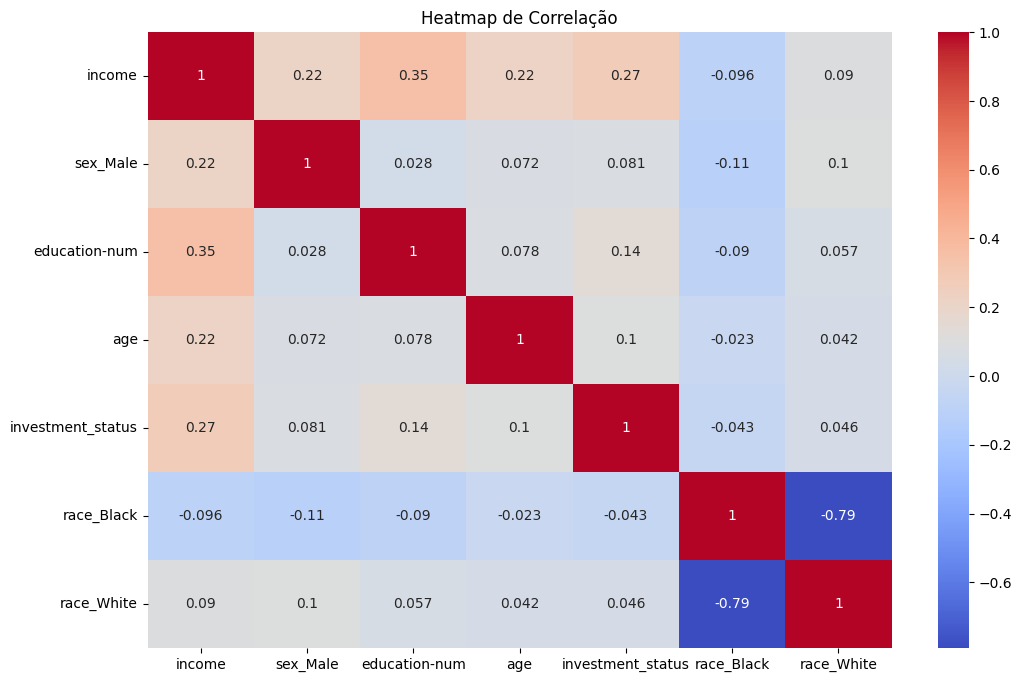

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['income', 'sex_Male', 'education-num', 'age', 'investment_status', 'race_Black', 'race_White']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

In [41]:
#sns.heatmap(numeric_data.corr(),annot=True)

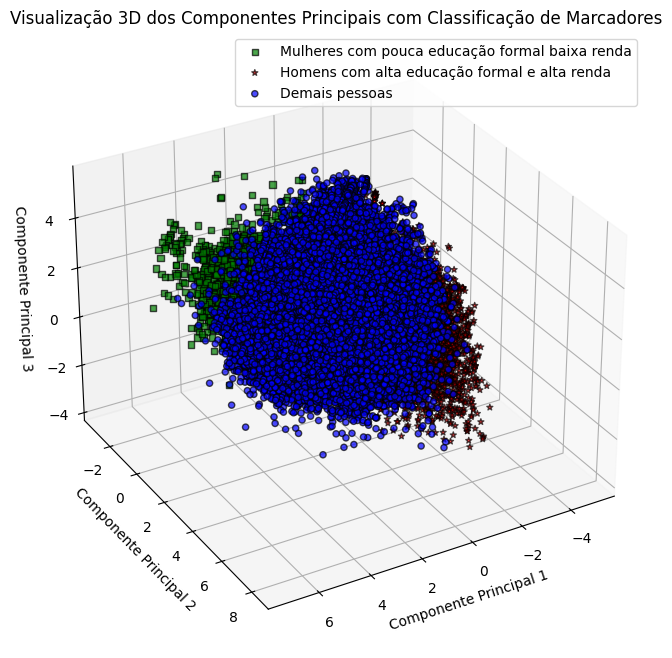

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Supondo que o DataFrame 'data' já está carregado e contém os atributos necessários

# Criando uma cópia do DataFrame original para realizar o PCA
dataPCA = data.copy()

# Selecionando apenas os atributos numéricos
numerical_features = dataPCA.select_dtypes(include=['number'])

# Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Aplicando o PCA para reduzir os dados a 3 componentes principais
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Adicionando os componentes principais de volta ao DataFrame
dataPCA['PC1'] = pca_result[:, 0]
dataPCA['PC2'] = pca_result[:, 1]
dataPCA['PC3'] = pca_result[:, 2]

# Criando a lógica para colorir os pontos com base nas condições especificadas
conditions = [
    (dataPCA['income'] == 1) & (dataPCA['sex_Male'] == 1) & (dataPCA['education-num'] >= 0.5),  # Verde
    (dataPCA['income'] == 0) & (dataPCA['sex_Male'] == 0) & (dataPCA['education-num'] < 0.5)   # Vermelho
]

# Definindo os marcadores correspondentes
dataPCA['marker'] = np.select(conditions, ['s', '*'], default='o')
dataPCA['color'] = np.select(conditions, ['green', 'red'], default='blue')

# Criando o gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

marker_to_label = {
    's': 'Mulheres com pouca educação formal baixa renda',
    '*': 'Homens com alta educação formal e alta renda',
    'o': 'Demais pessoas'
}
# Iterando sobre os diferentes tipos de marcadores para plotar separadamente
for marker in ['s', '*', 'o']:
    subset = dataPCA[dataPCA['marker'] == marker]
    ax.scatter(
        subset['PC1'],
        subset['PC2'],
        subset['PC3'],
        c=subset['color'],
        marker=marker,
        edgecolor='k',
        alpha=0.7,
        label=marker_to_label[marker]
    )

# Configurando os rótulos dos eixos
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Adicionando título e legenda
ax.set_title('Visualização 3D dos Componentes Principais com Classificação de Marcadores')
ax.legend()

# Ajustando o ângulo de visualização
ax.view_init(30, 60)

# Mostrando o gráfico
plt.show()


### Hipótese 2 - Imigrantes recebem menos que norte-americanos

Para validar ou refutar essa hipótese usando gráficos, será necessário plotar um **Gráfico de Barras** com as nacionalidades no eixo x e a porcentagem de pessoas dessa nacionalidade que tem renda >50k no eixo y.
<br><br>
* Se a barra dos EUA for a maior de todas, nossa hipótese foi validada.
<br>
* Se a barra dos EUA não for a maior ou estiverem bem empatadas, nossa hipótese foi refutada.

#### Mineração de Dados
Para validar ou refutar essa hipótese usando mineração de dados, podemos usar um modelo de classificação mais sensível a mudança no valor de atributos como a **Decision Tree** e calcular a acurácia dela normalmente, em seguida trocar as nacionalidades de americanos com estrangeiros e vice-cersa e verificar se após isso a acurácia reduz muito ou não.
<br><br>
* Se a acurácia diminuir muito após a troca, nossa hipótese foi validada.
<br>
* Se a acurácia subir ou manter igual após a troca, nossa hipótese foi refutada.

<br>
<hr>

#### Gráficos da Hipótese 2:



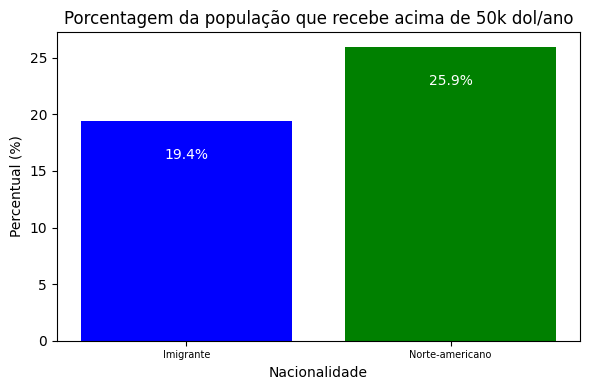

[19.40755873340143, 25.944285791260306]


In [43]:
# Selecionar apenas as colunas relevantes
data_filtered = data[['native-country', 'income']]

def get_percentual(total, x):
    return x / total * 100

# Filtrar os dados com base na nacionalidade e renda
total_imigrantes = data_filtered[data_filtered['native-country'] == 0].shape[0]
total_norteamericanos = data_filtered[data_filtered['native-country'] == 1].shape[0]

total_imigrantes_ricos = data_filtered[
    (data_filtered['native-country'] == 0) & (data_filtered['income'] == 1)
].shape[0]
total_norteamericanos_ricos = data_filtered[
    (data_filtered['native-country'] == 1) & (data_filtered['income'] == 1)
].shape[0]

# Calcular os percentuais
porcentagem_pessoas = [
    get_percentual(total_imigrantes, total_imigrantes_ricos),
    get_percentual(total_norteamericanos, total_norteamericanos_ricos)
]
nacionalidade = ['Imigrante', 'Norte-americano']

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(nacionalidade, porcentagem_pessoas, color=['blue', 'green'])

# Adicionar os valores das porcentagens abaixo das barras
for bar, porcentagem in zip(bars, porcentagem_pessoas):
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posição x
             bar.get_height() - 3,               # Posição y (ajuste para baixo)
             f'{porcentagem:.1f}%',             # Texto formatado
             ha='center', va='center', fontsize=10, color='white')

plt.title('Porcentagem da população que recebe acima de 50k dol/ano')
plt.xlabel('Nacionalidade')
plt.ylabel('Percentual (%)')
plt.xticks(fontsize=7)

plt.tight_layout()
plt.show()
print(porcentagem_pessoas)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar uma cópia do dataset para evitar alterar o original
data_copy = data.copy()

# Preparar os dados para o modelo
X = data_copy.drop(columns=['income', 'native-country'])
y = data_copy['income']

# Transformar a nacionalidade para binário (EUA vs Outros) na cópia
data_copy['native-country'] = data_copy['native-country'].apply(lambda xt: 'United-States' if xt == 'United-States' else 'Foreign')

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Acurácia original
accuracy_original = accuracy_score(y_test, y_pred)

# Trocar nacionalidades na cópia do dataset
data_copy['native-country'] = data_copy['native-country'].apply(lambda xt: 'Foreign' if xt == 'United-States' else 'United-States')

# Preparar novamente os dados modificados
X_modified = data_copy.drop(columns=['income', 'native-country'])
y_modified = data_copy['income']

# Divisão dos dados com o dataset modificado
X_train, X_test, y_train, y_test = train_test_split(X_modified, y_modified, test_size=0.3, random_state=42)

# Re-treinar o modelo com os dados modificados
clf.fit(X_train, y_train)
y_pred_modified = clf.predict(X_test)

# Acurácia após a troca
accuracy_modified = accuracy_score(y_test, y_pred_modified)

print("Acurácia original:", accuracy_original)
print("Acurácia após a troca:", accuracy_modified)

# Verificar a hipótese
if accuracy_original - accuracy_modified > 0.05:  # Definir um limite para "grande redução"
    print("Hipótese validada: A acurácia diminuiu muito após a troca.")
else:
    print("Hipótese refutada: A acurácia não mudou significativamente.")


Acurácia original: 0.809357485175859
Acurácia após a troca: 0.809357485175859
Hipótese refutada: A acurácia não mudou significativamente.


### Hipótese 3 - A quantidade de horas trabalhadas por semana não está relacionada à renda do indivíduo

Para validar ou refutar essa hipótese usando gráficos, será necessário plotar dois **Violin Plot** (um do lado do outro no eixo x) em que o primeiro considera apenas as pessoas com salario > 50k e tem as horas trabalhadas no eixo y e o segundo considera apenas as pessoas com salario < 50k e também tem as horas trabalhadas no eixo y.
<br><br>
Se o Violin Plot do salário > 50k estiver mais concentrado em cima (onde tem as maiores horas trabalhadas) e o Violin Plot do salário < 50k estiver mais concentrado em baixo (onde tem as menores horas trabalhadas), então nossa hipotese foi refutada.
<br>
Se os Violin Plot estiverem iguais ou o Violin Plot do salário < 50k estiver mais concentrado em cima (onde tem as maiores horas trabalhadas), então nossa hipotese foi validada.

<br>

Para validar ou refutar essa hipótese usando mineração de dados, podemos calcular o **Mutual Information Gain** de todas as variáveis para prever se o salário vai ser maior ou menor que 50k
<br><br>
Se o mutual information gain for maior que os das demais variáveis, nossa hipotese foi refutada.
<br>
Se o mutual information gain for igual ou menor que os das demais variáveis, nossa hipotese foi validada.

<br>
<hr>

#### Gráficos da Hipótese 3:


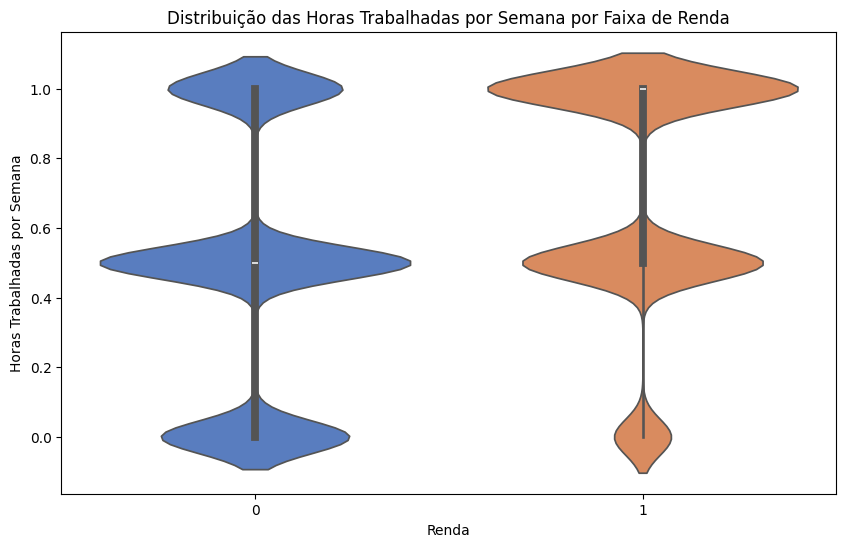

Mutual Information Gain para cada variável:
                                 Feature  Mutual Information
39     investment_status_naoDiscretizado            0.130951
11     marital-status_Married-civ-spouse            0.109981
1                          education-num            0.063728
41                   age_naoDiscretizada            0.059331
0                                    age            0.059209
13          marital-status_Never-married            0.058098
40                     investment_status            0.043257
31                relationship_Own-child            0.036821
2                         hours-per-week            0.034327
38                              sex_Male            0.030741
22              occupation_Other-service            0.022379
29            relationship_Not-in-family            0.019435
18            occupation_Exec-managerial            0.018585
24             occupation_Prof-specialty            0.016580
32                relationship_Unmarried 

In [45]:
# Gráfico Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="income", y="hours-per-week", data=data, palette="muted")
plt.title("Distribuição das Horas Trabalhadas por Semana por Faixa de Renda")
plt.xlabel("Renda")
plt.ylabel("Horas Trabalhadas por Semana")
plt.show()

# Cálculo do Mutual Information Gain
# Codificar variáveis categóricas
le = LabelEncoder()
data['income_encoded'] = le.fit_transform(data['income'])  # income_encoded: 1 para >50K, 0 para <=50K

# Selecionar as features e a variável target
features = data.drop(columns=['income', 'income_encoded'])
target = data['income_encoded']

# Calcular Mutual Information
mutual_info = mutual_info_classif(features, target, discrete_features='auto')
mi_df = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': mutual_info
})

# Exibir os resultados
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)
print("Mutual Information Gain para cada variável:")
print(mi_df)

Analisando os Violin Plots, é possível interpretar que a hipótese é parcialmente validada, já que ao observar a faixa intermediária de horas trabalhadas por semana, nota-se que há uma densidade maior de pessoas na faixa de salários mas baixa, mesmo que eles trabalhem o mesmo tanto que as pessoas com maior salário. Contudo, ao observar os extremos de quantidade de horas trabalhadas, nota-se que há certa relação entre os dois atributos, já que há mais pessoas da faixa de salário mais alta que trabalham mais horas por dia, e menos na faixa de salário mais baixa, sendo que para as pessoas da faixa de salário mais baixa, não há essa diferença toda.

Já através da análise do Mutual Information Gain, conclui-se que a variável hours-per-week não é a mais relevante para prever a renda, sendo superada por variáveis como estado civil, educação e idade. Isso valida a hipótese de que as horas trabalhadas por semana não estão fortemente relacionadas à renda do indivíduo, já que outras variáveis apresentam maior Mutual Information Gain.

### Hipótese 4 - Mulheres recebem menos que homens mesmo se filtrarmos por horas trabalhadas e nível de escolaridade

Para validar ou refutar essa hipótese usando gráficos, será necessário agrupar os dados em dois grupos, homens e mulheres, após isso devemos plotar um **Gráfico de Barras** agrupadas, com o eixo X sendo o número de horas trabalhadas e o eixo Y a renda. No segundo gráfico o eixo X seria o nível de educação.

Se os valores de salário médio (referente ao eixo Y) de mulheres forem significativamente mais baixos que os homens, nossa hipótese será validada.

Se os valores de salário médio (referente ao eixo Y) entre os agrupamentos são forem significamente diferentes nossa hipótese será refutada.

Se existir diferença na Renda prevista somente alterando o Gênero dos exemplos de teste a nossa hipótese foi validada.

Se não existir diferença na Renda prevista somente alterando o Gênero dos exemplos de teste a nossa hipótese foi refutada.

<br>
<hr>

#### Graficos da Hipotese 4

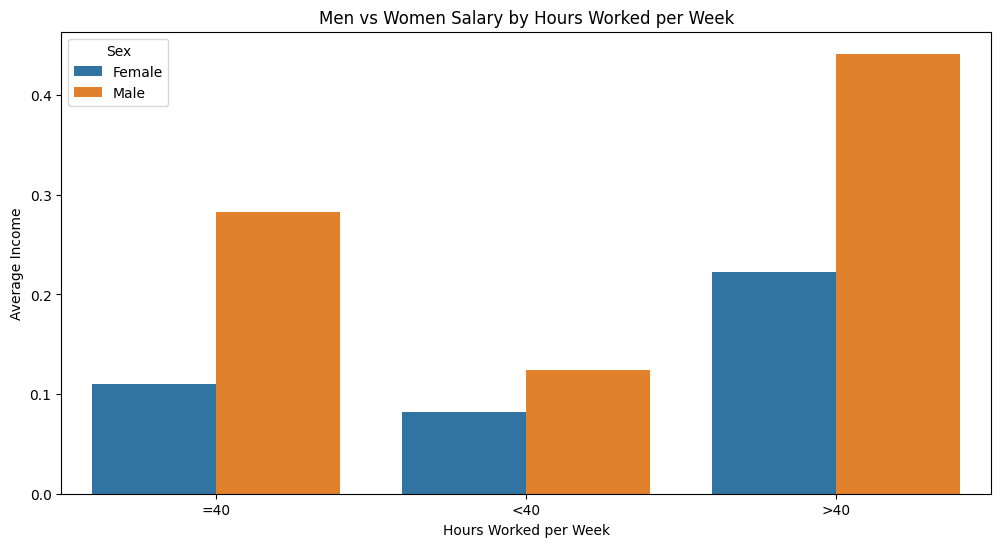

In [46]:
data['education_level'] = pd.cut(data['education-num'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

data['hours_category'] = data['hours-per-week'].map({0: '<40', 0.5: '=40', 1: '>40'})


plt.figure(figsize=(12, 6))
sns.barplot(x='hours_category', y='income', hue='sex_Male', data=data, errorbar=None)
plt.title('Men vs Women Salary by Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Average Income')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

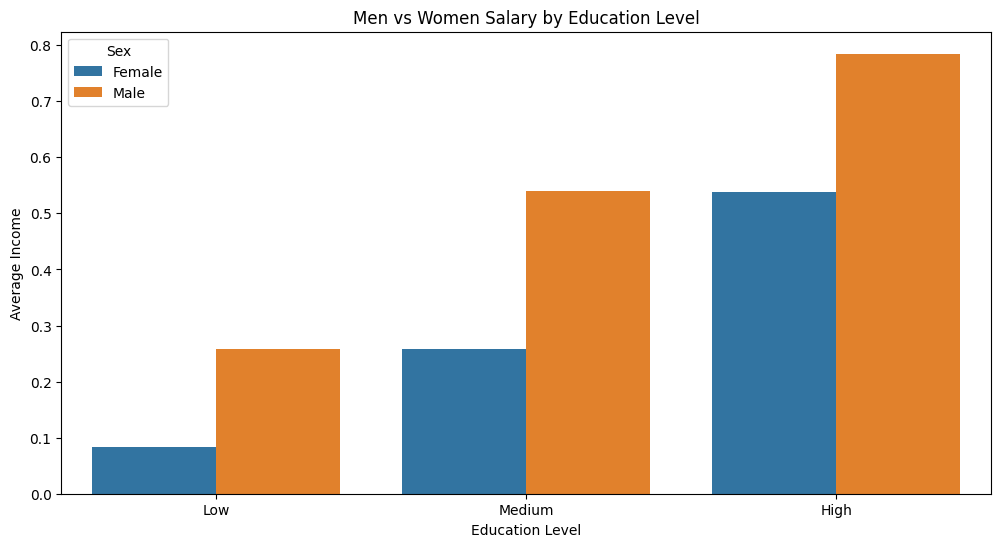

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='education_level', y='income', hue='sex_Male', data=data, errorbar=None)
plt.title('Men vs Women Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

A hipótese foi evidentemente validada.

### Hipótese 5 - Indivíduos mais jovens se arriscam mais com investimentos do que indivíduos que são mais velhos

Para validar ou refutar essa hipótese usando gráficos, será necessário juntar as colunas de investimentos que deram lucro e investimentos que deram prejuízo em uma só coluna e em seguida plotar **Gráfico de Dispersão** (um gráfico que parece o gráfico da regressão linear) contendo a idade no eixo x e o valor investido no eixo y.
<br><br>
Se a linha do Gráfico de Dispersão for uma reta decrescente, então nossa hipótese foi validada.
<br>
Se a linha do Gráfico de Dispersão for uma reta crescente ou estável (não desce nem sobe), então nossa hipótese foi refutada.

<br>

Para validar ou refutar essa hipótese usando mineração de dados, podemos fazer um modelo de **Regressão Linear** em que primeiro treinamos com todos os atributos e em seguida retiramos o atributo de idade do treino do nosso modelo para prever o valor dos investimentos.
<br><br>
Se o Erro Quadrático Médio (ou alguma medida semelhante) do modelo cair muito, indicando que o atributo idade era importante, então nossa hipótese foi validada.
<br>
Se o Erro Quadrático Médio (ou alguma medida semelhante) do modelo subir ou manter-se igual nos dois testes, indicando que o atributo idade não era importante, então nossa hipótese foi refutada.

<br>
<hr>

#### Gráficos da Hipótese 5:


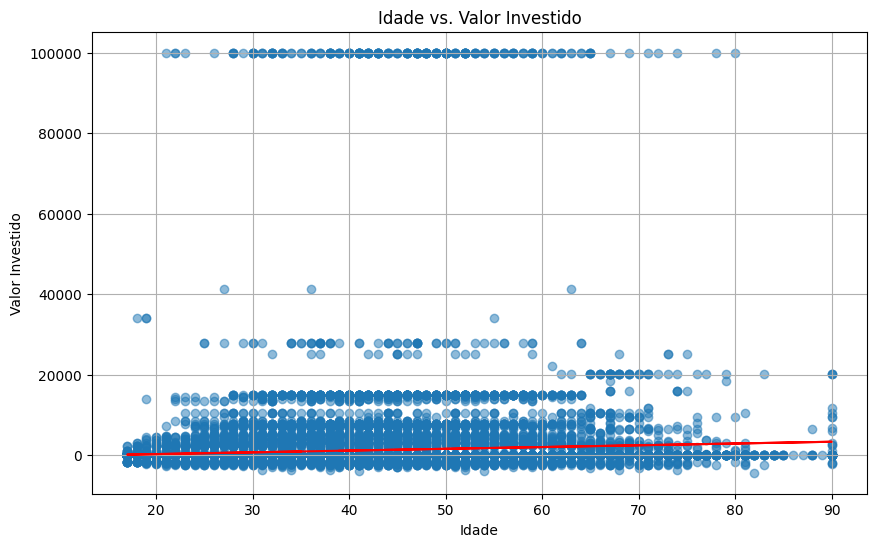

In [48]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(data['age_naoDiscretizada'], data['investment_status_naoDiscretizado'], alpha=0.5)  # alpha para transparência dos pontos
plt.title('Idade vs. Valor Investido')
plt.xlabel('Idade')
plt.ylabel('Valor Investido')
plt.grid(True)

# Adicionando a linha de regressão linear
# Adicionando uma constante para a regressão
X = sm.add_constant(data['age_naoDiscretizada'])
y = data['investment_status_naoDiscretizado']

# Ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Criando uma linha de tendência com base nos coeficientes da regressão
plt.plot(data['age_naoDiscretizada'], model.predict(X), color='red')

plt.show()

### Conclusões

Na elaboração desse trabalho foi possível utilizar diversas técnicas de análise e pré-processamento de dados que foram aprendidos em sala de aula. E também foi possível fundamentar a teoria das nossas hipóteses através de visualizações e tarefas que foram aprendidas e que serão aplicadas em etapas posteriores.

### **Referências**

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Géron, Aurélien. Mãos à obra: Aprendizado de máquina com Scikit-Learn, Keras e TensorFlow: Conceitos, ferramentas e técnicas para construir sistemas inteligentes. 2ª ed. Sebastopol, CA: O'Reilly Media, Inc., 2019. 856 páginas. ISBN 978-1-4920-3261-8.

Slides de Aula - Aprendizado de Máquina 1

Slides de Sula - Processamento e Visualização de dados

https://medium.com/@keler.yohan/como-refinar-os-hiper-par%C3%A2metros-de-um-modelo-xgboost-em-python-a096f6ca8f14
